In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import pynucl
import random as r
from Bio import SeqIO
import numpy as np
from collections import Counter
import matplotlib.cm as cm
from tqdm.auto import tqdm
import MDAnalysis as mda
import nglview as nv
import Bio

In [48]:
symmetric_df = pd.read_csv('subs_df_symmetric.csv')
cleaned_df = pd.read_csv('subs_df_cleaned.csv')
his_table = pd.read_csv('histones.csv')

{'H2A.B', 'cenH3', 'H2A.Z', 'cH4', 'cH2A', 'H2A.X', 'subH2B', 'H2A.W', 'H2B.1', 'H2A.1', 'H2A.L', 'H2A.P', 'cH3', 'H3.3', 'H2B.W', 'macroH2A', 'H2B.Z', 'cH2B'}


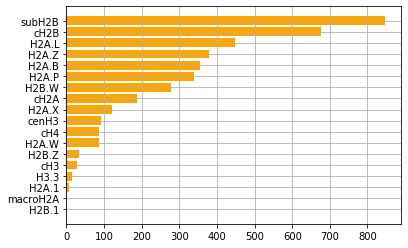

In [49]:
subs_df = cleaned_df

set_a = set(subs_df['a_variant'].unique())
set_b = set(subs_df['b_variant'].unique())
variants = set_a.union(set_b)
print(variants)
his_dict = {}


for his in variants:
    req = subs_df.loc[(subs_df['a_variant']==his) | (subs_df['b_variant']==his)]
    his_dict[his] = len(req)

his_dict = {res: his_dict[res] for res in 
                          sorted(his_dict, key=his_dict.get)}    
width = list(his_dict.values())
y = list(his_dict.keys())

plt.barh(y, width, color="orange")
plt.grid()

{'H2A.B', 'cenH3', 'H2A.Z', 'cH4', 'cH2A', 'H2A.X', 'subH2B', 'H2A.W', 'H2B.1', 'H2A.1', 'H2A.L', 'H2A.P', 'cH3', 'H3.3', 'H2B.W', 'macroH2A', 'H2B.Z', 'cH2B'}


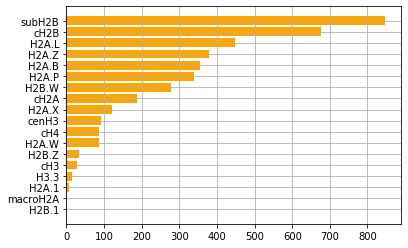

In [50]:
subs_df = cleaned_df

set_a = set(subs_df['a_variant'].unique())
set_b = set(subs_df['b_variant'].unique())
variants = set_a.union(set_b)
print(variants)
his_dict = {}


for his in variants:
    req = subs_df.loc[(subs_df['a_variant']==his) | (subs_df['b_variant']==his)]
    his_dict[his] = len(req)

his_dict = {res: his_dict[res] for res in 
                          sorted(his_dict, key=his_dict.get)}    
width = list(his_dict.values())
y = list(his_dict.keys())

plt.barh(y, width, color="orange")
plt.grid()

In [51]:
subs_df = symmetric_df

matrix_dict = {}

for a_variant_ind in variants:
    matrix_dict[a_variant_ind] = []
    for b_variant_col in variants:
        series = subs_df.loc[(subs_df['b_variant']==b_variant_col) & (subs_df['a_variant']==a_variant_ind)]
        amount = len(series)
        matrix_dict[a_variant_ind].append(amount)
              
matrix = pd.DataFrame(matrix_dict, index=matrix_dict.keys())
display(matrix)
print(matrix_dict)


,H2A.B,cenH3,H2A.Z,cH4,cH2A,H2A.X,subH2B,H2A.W,H2B.1,H2A.1,H2A.L,H2A.P,cH3,H3.3,H2B.W,macroH2A,H2B.Z,cH2B
H2A.B,0,12,0,0,0,0,278,0,0,0,0,0,0,0,60,0,0,4
cenH3,12,0,28,8,10,14,0,2,0,0,12,6,0,0,0,0,0,0
H2A.Z,0,28,0,19,0,0,0,0,0,0,0,0,1,2,0,0,14,315
cH4,0,8,19,0,2,0,0,0,0,0,0,0,27,9,0,0,0,22
cH2A,0,10,0,2,0,0,7,0,0,0,0,0,1,0,1,0,10,158
H2A.X,0,14,0,0,0,0,5,0,0,0,0,0,0,4,1,0,9,88
subH2B,278,0,0,0,7,5,0,0,0,6,319,232,0,0,0,0,0,0
H2A.W,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84
H2B.1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
H2A.1,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0


{'H2A.B': [0, 12, 0, 0, 0, 0, 278, 0, 0, 0, 0, 0, 0, 0, 60, 0, 0, 4], 'cenH3': [12, 0, 28, 8, 10, 14, 0, 2, 0, 0, 12, 6, 0, 0, 0, 0, 0, 0], 'H2A.Z': [0, 28, 0, 19, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 14, 315], 'cH4': [0, 8, 19, 0, 2, 0, 0, 0, 0, 0, 0, 0, 27, 9, 0, 0, 0, 22], 'cH2A': [0, 10, 0, 2, 0, 0, 7, 0, 0, 0, 0, 0, 1, 0, 1, 0, 10, 158], 'H2A.X': [0, 14, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 4, 1, 0, 9, 88], 'subH2B': [278, 0, 0, 0, 7, 5, 0, 0, 0, 6, 319, 232, 0, 0, 0, 0, 0, 0], 'H2A.W': [0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84], 'H2B.1': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0], 'H2A.1': [0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'H2A.L': [0, 12, 0, 0, 0, 0, 319, 0, 0, 0, 0, 0, 0, 0, 118, 0, 0, 0], 'H2A.P': [0, 6, 0, 0, 0, 0, 232, 0, 1, 0, 0, 0, 0, 0, 97, 0, 0, 3], 'cH3': [0, 0, 1, 27, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'H3.3': [0, 0, 2, 9, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'H2B.W': [60, 0, 0, 0, 1, 1, 0, 0, 0, 0, 118, 97, 0, 0,

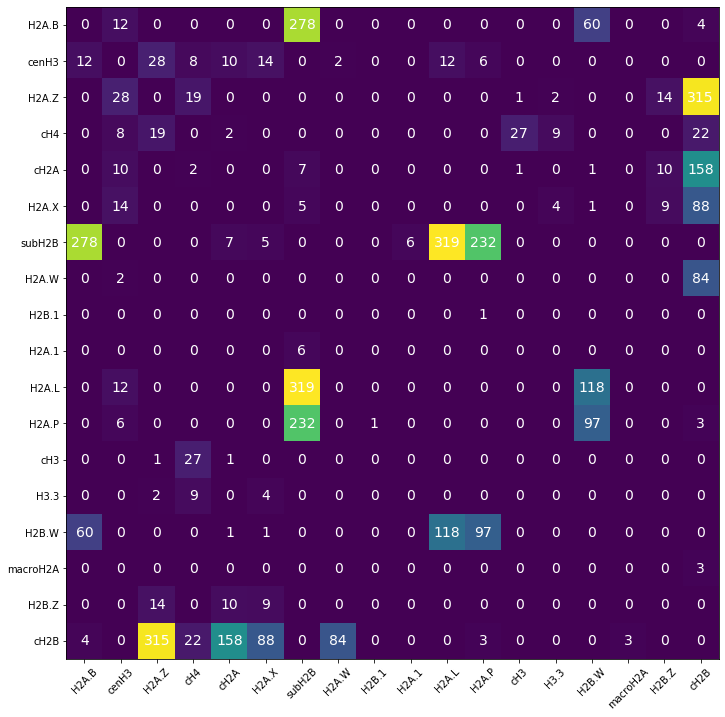

In [52]:
names = matrix_dict.keys()
tick_range = range(len(names))
matrix = np.array(matrix)

plt.figure(figsize=(12, 12))
plt.imshow(matrix)
plt.xticks(tick_range, names, rotation=45)
plt.yticks(tick_range, names)
for i in range(len(matrix)):
    for j in range(len(matrix)):
        text = plt.text(j, i, matrix[i, j],
                       ha="center", va="center", fontsize=14, color="w")
        
plt.savefig('pictures_for_article/heatmap_fig.png')

In [53]:
colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000',
          '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#000000']

In [54]:
aminoacids = ['P', 'S', 'V', 'R', 'T', 'E', 'D', 'A', 'G', 'N', 'Q', 'K', 'I', 'L', 'M', 'F', 'Y', 'W', 'H', 'C', '-']

In [55]:
colors_dict = {res: color for res, color in zip(aminoacids, colors)}
colors_dict

{'P': '#e6194b',
 'S': '#3cb44b',
 'V': '#ffe119',
 'R': '#4363d8',
 'T': '#f58231',
 'E': '#911eb4',
 'D': '#46f0f0',
 'A': '#f032e6',
 'G': '#bcf60c',
 'N': '#fabebe',
 'Q': '#008080',
 'K': '#e6beff',
 'I': '#9a6324',
 'L': '#fffac8',
 'M': '#800000',
 'F': '#aaffc3',
 'Y': '#808000',
 'W': '#ffd8b1',
 'H': '#000075',
 'C': '#808080',
 '-': '#000000'}

In [56]:
def get_percentage(pct):
    if pct >= 0.5:
        return "{:1.1f}%".format(pct)


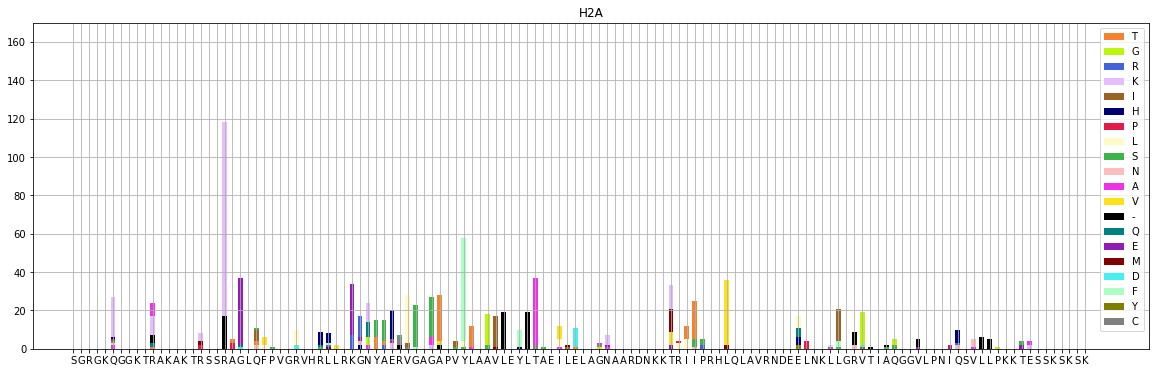

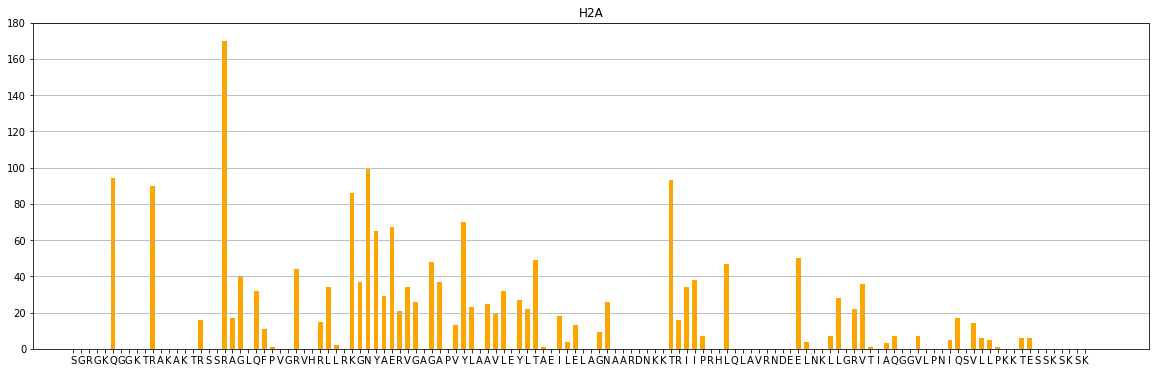

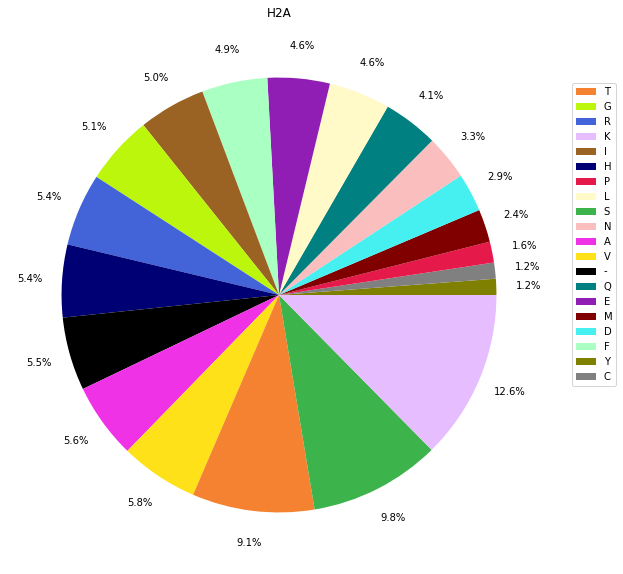

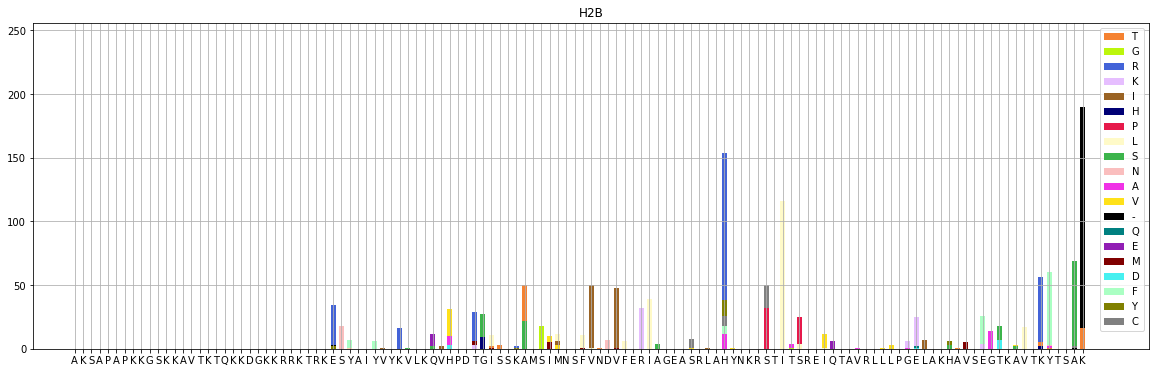

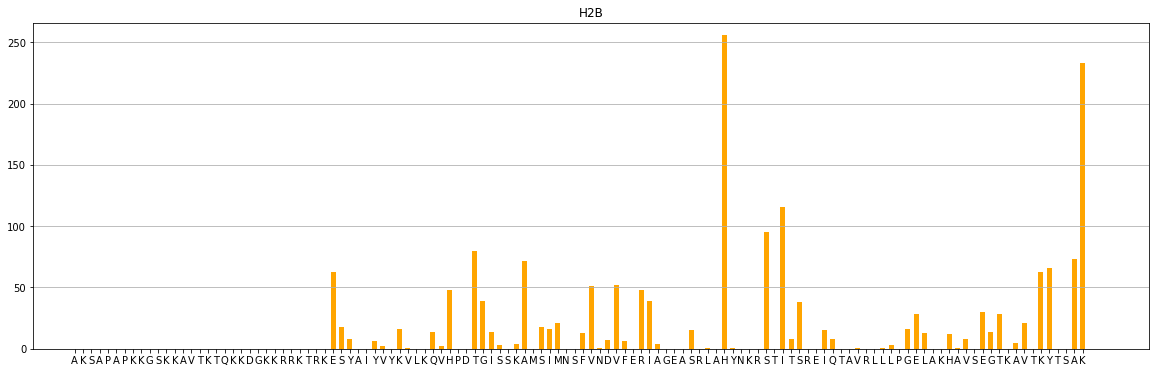

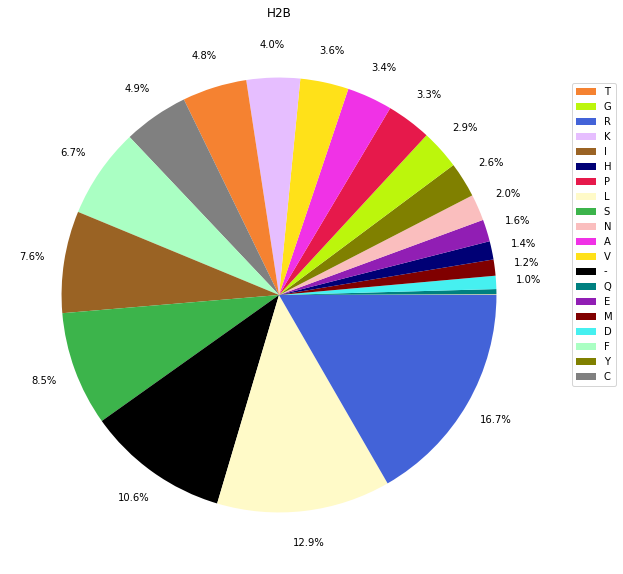

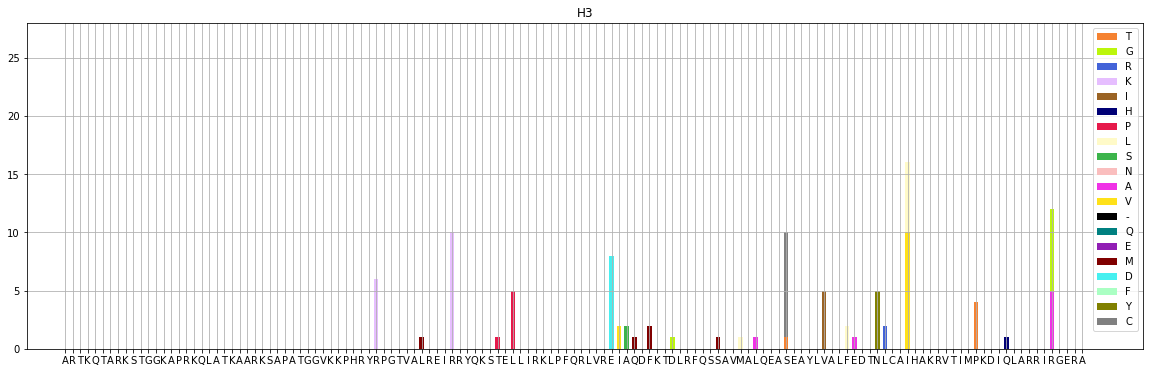

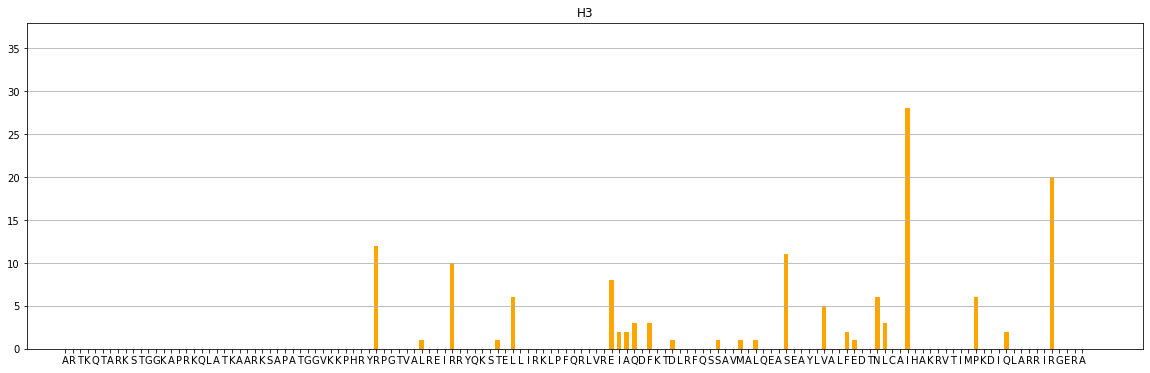

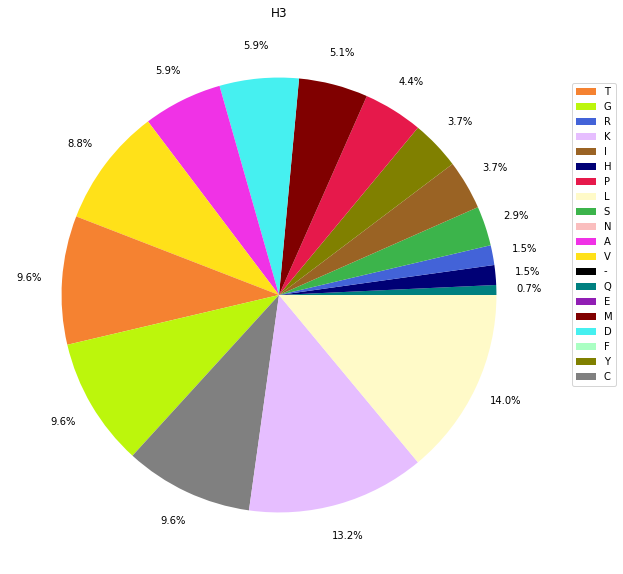

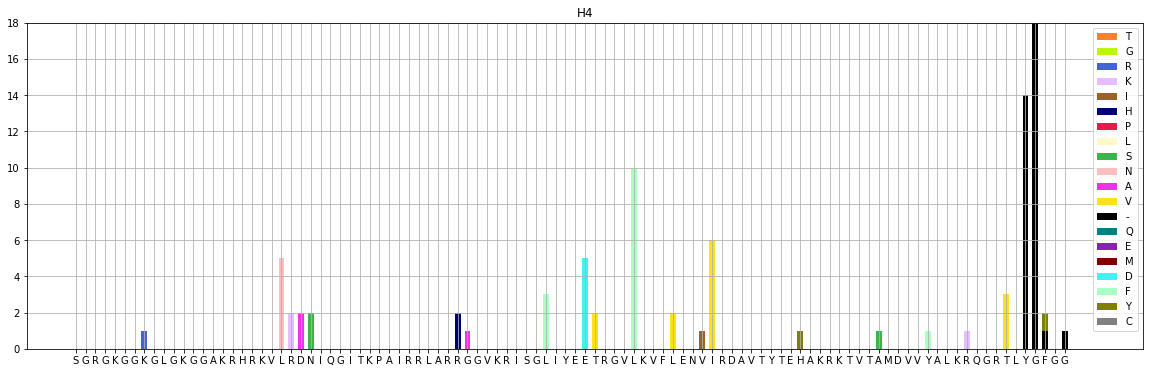

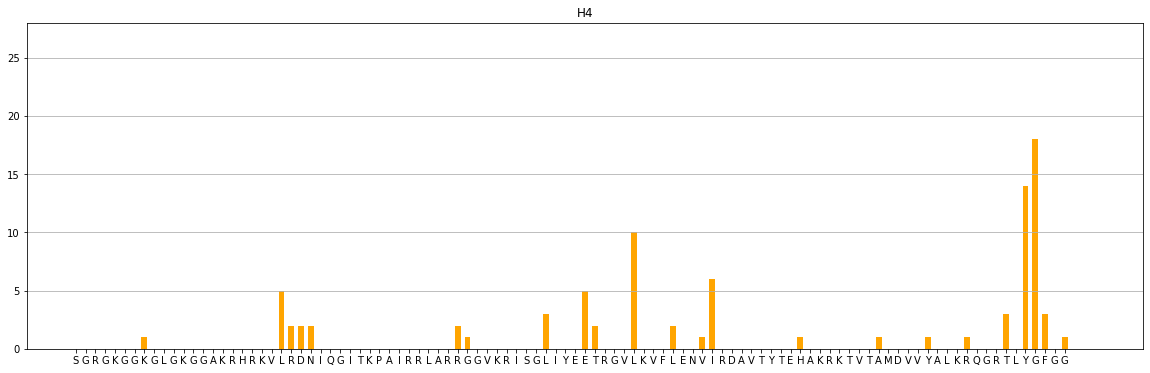

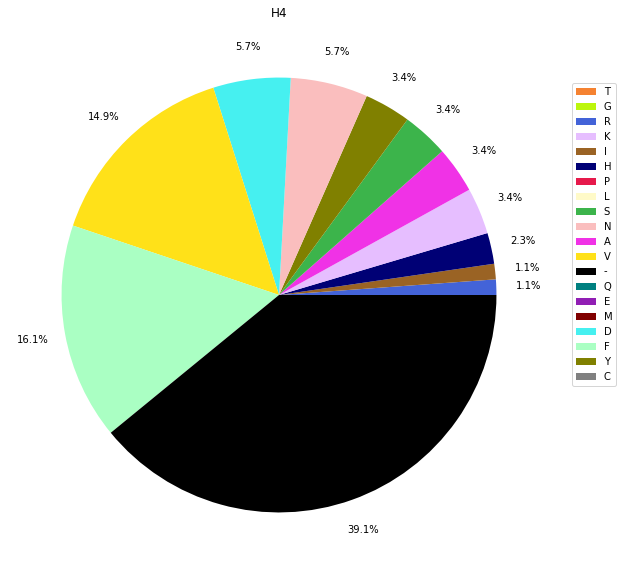

In [57]:
subs_df = cleaned_df

h2a = 'SGRGKQGGKTRAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGAGAPVYLAAVLEYLTAEILELAGNAARDNKKTRIIPRHLQLAVRNDEELNKLLGRVTIAQGGVLPNIQSVLLPKKTESSKSKSK'
h2b = 'AKSAPAPKKGSKKAVTKTQKKDGKKRRKTRKESYAIYVYKVLKQVHPDTGISSKAMSIMNSFVNDVFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVTKYTSAK'
h3 =  'ARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEASEAYLVALFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA'
h4 =  'SGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG'


core_histones = [h2a, h2b, h3, h4]
names = ['H2A', 'H2B', 'H3', 'H4']

flag = 1
permanent_bars = []
permanent_labels = []
global_mut_counter = []
expected_counters = []

for his, name in zip(core_histones, names):
    mut_counter = [0 for i in range(len(his))]
    expected_counter = 0
    a_pos = subs_df.loc[subs_df['a_entity']==name]['a_resid']
    b_pos = subs_df.loc[subs_df['b_entity']==name]['b_resid']
    positions = pd.concat([a_pos, b_pos])
    for pos in positions:
        pos_index = pos - 1
        mut_counter[pos_index] += 1     
    global_mut_counter.append(mut_counter)

    

    used_res = set()
    plt.figure(figsize=(20, 6))
    plt.ylim(0, max(mut_counter))
    plt.xlim(-5, len(his) + 7)
    plt.xticks(range(0, len(his)), labels=[res for res in his])
    plt.grid()
    plt.title(name)
    for i in range(len(mut_counter)):
        cur_pos = mut_counter[i]
        if cur_pos != 0:
            a_residues = subs_df.loc[(subs_df['a_resid']==i + 1) & (subs_df['a_entity']==name)]['a_new_resname']
            b_residues = subs_df.loc[(subs_df['b_resid']==i + 1) & (subs_df['b_entity']==name)]['b_new_resname']  
            residues = pd.concat([a_residues, b_residues])
            counter = dict(Counter(residues))
            for amount, res in zip(counter.values(), counter.keys()):
                point_color = colors_dict[res]
                if flag==1 and res not in used_res:
                    bar = plt.bar(i, amount, color=point_color, width=0.6, label=res)
                    permanent_labels.append(res)
                    permanent_bars.append(bar)
                    used_res.add(res)
                else:
                    plt.bar(i, amount, color=point_color, width=0.6)    
                expected_counter += amount
    expected_counters.append(expected_counter)
    plt.legend(permanent_bars, permanent_labels)
    used_res.clear()
    plt.savefig(f'pictures_for_article/colored_barplots/{name}_fig.png')
    
      
        
    plt.figure(figsize=(20, 6))
    plt.title(name)
    plt.xlim(-5, len(his) + 7)
    plt.ylim(0, max(mut_counter)+10)
    plt.grid(axis='y')
    plt.bar(range(len(his)), mut_counter, width=0.6, color='orange')
    plt.xticks(range(0, len(his)), labels=[res for res in his])
    plt.savefig(f'pictures_for_article/barplots_abs_values//{name}_fig.png')
    
    
    global_res_counter = Counter()
    for i in range(len(mut_counter)):
        cur_pos = mut_counter[i]
        if cur_pos != 0:
            a_residues = subs_df.loc[(subs_df['a_resid']==i + 1) & (subs_df['a_entity']==name)]['a_new_resname']
            b_residues = subs_df.loc[(subs_df['b_resid']==i + 1) & (subs_df['b_entity']==name)]['b_new_resname']  
            residues = pd.concat([a_residues, b_residues])
            for res in residues:
                global_res_counter[res] += 1
                
                
    global_res_counter = {res: global_res_counter[res] for res in 
                          sorted(global_res_counter, key=global_res_counter.get)}
    labels = list(key for key in global_res_counter.keys() if global_res_counter[key] >= 1)
    sizes = list(global_res_counter.values())
    colors = [colors_dict[res] for res in labels] 
    plt.figure(figsize=(10, 10))
    plt.pie(sizes, colors=colors, autopct=lambda x: get_percentage(x), pctdistance=1.15)
    plt.legend(permanent_bars, permanent_labels, bbox_to_anchor=(1.13, 0.9))
    plt.title(name)
    plt.savefig(f'pictures_for_article/pies/{name}_fig.png')

    
     
    flag = 0

In [58]:
h2a = 'SGRGKQGGKTRAKAKTRSSRAGLQFPVGRVHRLLRKGNYAERVGAGAPVYLAAVLEYLTAEILELAGNAARDNKKTRIIPRHLQLAVRNDEELNKLLGRVTIAQGGVLPNIQSVLLPKKTESSKSKSK'
h2b = 'AKSAPAPKKGSKKAVTKTQKKDGKKRRKTRKESYAIYVYKVLKQVHPDTGISSKAMSIMNSFVNDVFERIAGEASRLAHYNKRSTITSREIQTAVRLLLPGELAKHAVSEGTKAVTKYTSAK'
h3 =  'ARTKQTARKSTGGKAPRKQLATKAARKSAPATGGVKKPHRYRPGTVALREIRRYQKSTELLIRKLPFQRLVREIAQDFKTDLRFQSSAVMALQEASEAYLVALFEDTNLCAIHAKRVTIMPKDIQLARRIRGERA'
h4 =  'SGRGKGGKGLGKGGAKRHRKVLRDNIQGITKPAIRRLARRGGVKRISGLIYEETRGVLKVFLENVIRDAVTYTEHAKRKTVTAMDVVYALKRQGRTLYGFGG'

segids = {name: chain for name, chain in zip(names, 'CDAB')}
nucl = mda.Universe('1KX5.pdb').select_atoms('protein and (segid A or segid B or segid C or segid D) or nucleic') 


core_histones = [h2a, h2b, h3, h4]
names = ['H2A', 'H2B', 'H3', 'H4']
flag = 1
 
for name, mut_counter, his, ex_counter in zip(names, global_mut_counter, core_histones, expected_counters):
    mean = ex_counter / len(his)
    estimation = [True if num >= mean else False for num in mut_counter]
    view = nv.show_mdanalysis(nucl, gui=True)
    view.clear()
    chain = segids[name]
    print(name, mean)
    atom_ids = nucl.select_atoms(f'protein and segid {chain}').residues.ids
    mroe_mean = np.concatenate([atom_ids[i] for i in range(len(atom_ids)) if estimation[i]])
    view.add_representation('cartoon', nucl.select_atoms(f'not segid {chain}').ids)
    view.add_representation('hyperball', nucl.select_atoms(f'segid {chain}').ids, color='green')
    view.add_representation('contact', nucl.select_atoms(f'segid {chain}').ids, color='green')
    view.add_representation('hyperball', mroe_mean, color='red')
    display(view)

/opt/miniconda3/envs/moldyn/lib/python3.7/site-packages/MDAnalysis/topology/guessers.py:80: UserWarning: Failed to guess the mass for the following atom types: MN
  warnings.warn("Failed to guess the mass for the following atom types: {}".format(atom_type))


H2A 15.046875


NGLWidget()

H2B 15.040983606557377


NGLWidget()

H3 1.0074074074074073


NGLWidget()

H4 0.8529411764705882


NGLWidget()

In [59]:
view = nv.show_mdanalysis(mda.Universe('1KX5.pdb').select_atoms('protein and (segid A or segid B or segid C or segid D) or nucleic') , gui=True)
view.clear()
view.add_representation('cartoon')
display(view)

NGLWidget()

In [60]:
all_sp = subs_df['species'].unique()
unique_sp = {sp: set() for sp in all_sp}

for sp in all_sp:
    ser = subs_df.loc[subs_df['species']==sp]
    a_acc, b_acc = ser['a_accsession'], ser['b_accsession']
    accs = pd.concat([a_acc, b_acc])
    for acc in accs:
        his_type = his_table.loc[his_table['accession']==acc]['type'].iloc[0]
        unique_sp[sp].add(his_type)

print(unique_sp)

all_his = [sp for sp in unique_sp if len(unique_sp[sp]) == 4]
print(all_his)

{'Tetrahymena thermophila SB210': {'H3', 'H4'}, 'Trypanosoma brucei brucei TREU927': {'H2A', 'H4', 'H2B', 'H3'}, 'Saccharomyces cerevisiae S288C': {'H2A', 'H4', 'H2B', 'H3'}, 'Homo sapiens': {'H2A', 'H4', 'H2B', 'H3'}, 'Arabidopsis thaliana': {'H2B', 'H2A', 'H3'}, 'Caenorhabditis elegans': {'H3', 'H2A'}, 'Drosophila melanogaster': {'H3', 'H2A', 'H2B'}, 'Perkinsus marinus ATCC 50983': {'H3', 'H2A'}, 'Mus musculus': {'H2B', 'H2A', 'H3'}, 'Macaca mulatta': {'H2B', 'H2A'}, 'Canis lupus familiaris': {'H2B', 'H2A'}, 'Ailuropoda melanoleuca': {'H2B', 'H2A'}, 'Loxodonta africana': {'H2B', 'H2A'}, 'Sus scrofa': {'H2B', 'H2A'}, 'Bos taurus': {'H2B', 'H2A'}, 'Cricetulus griseus': {'H2B', 'H2A'}, 'Heterocephalus glaber': {'H2B', 'H2A'}, 'Oryctolagus cuniculus': {'H2B', 'H2A'}, 'Cavia porcellus': {'H2B', 'H2A'}, 'Toxoplasma gondii ME49': {'H2B', 'H2A'}, 'Monodelphis domestica': {'H2B', 'H2A'}, 'Gallus gallus': {'H2B', 'H2A'}}
['Trypanosoma brucei brucei TREU927', 'Saccharomyces cerevisiae S288C', '